# ADAPTIVE AI TUTOR

- **Gradio Link: https://www.gradio.app/**

In [1]:
%pip install -q --upgrade openai python-dotenv gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import os
from IPython.display import display, Markdown
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Retrieve the OpenAI API key from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

print("OpenAI API Key loaded successfully.")
print(f"Key starts with: {openai_api_key[:10]}...")

# Configure the OpenAI Client using the loaded key
openai_client = OpenAI(api_key=openai_api_key)
print("OpenAI client configured.")



OpenAI API Key loaded successfully.
Key starts with: sk-QOmY8vA...
OpenAI client configured.


In [3]:
# Define a helper function to display markdown nicely
def print_markdown(text):
    """Displays text as Markdown in Jupyter."""
    display(Markdown(text))

In [5]:
# Python function to get a response from the AI Tutor
def get_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API, asking it to respond as an AI Tutor.

    Args:
        user_question (str): The question asked by the user.

    Returns:
        str: The AI's response, or an error message.
    """
    # Define the system prompt - instructions for the AI's personality and role
    system_prompt = "You are a helpful and patient AI Tutor. Explain concepts clearly and concisely."

    try:
        # Make the API call to OpenAI
        response = openai_client.chat.completions.create(
            model = "gpt-4o-mini",  # A fast and capable model suitable for tutoring
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,  # Allows for some creativity but keeps responses focused
        )
        # Extract the answer content
        ai_response = response.choices[0].message.content
        return ai_response

    except Exception as e:
        # Handle potential errors during the API call
        print(f"An error occurred: {e}")
        return f"Sorry, I encountered an error trying to get an answer: {e}"

In [ ]:
test_question = "Could you explain the concept of functions in Python and their purpose in programming?"
print_markdown(f"Asking the AI Tutor: '{test_question}'")

# Call the function and store the response
tutor_answer = get_ai_tutor_response(test_question)

# Print the AI's response
print_markdown("\n🤖 AI Tutor's Response:\n")
print_markdown(tutor_answer)

Asking the AI Tutor: 'Could you explain the concept of functions in Python and their purpose in programming?'


🤖 AI Tutor's Response:


Certainly! In Python, a **function** is a reusable block of code that performs a specific task. Functions help organize code, make it more readable, and allow for code reuse, which can improve efficiency and reduce redundancy.

### Key Concepts of Functions in Python:

1. **Definition**: A function is defined using the `def` keyword, followed by the function name and parentheses. Any parameters (inputs) are specified within the parentheses.

   ```python
   def my_function(parameter1, parameter2):
       # Code block to execute
       result = parameter1 + parameter2
       return result
   ```

2. **Parameters and Arguments**: Functions can take parameters, which are variables that allow you to pass data into the function. When you call a function, you provide arguments, which are the actual values of those parameters.

   ```python
   sum_result = my_function(5, 10)  # Here, 5 and 10 are arguments
   ```

3. **Return Statement**: Functions can return values using the `return` statement. This allows the function to send back a result to wherever it was called.

4. **Calling a Function**: To execute a function, you simply call it by its name and pass any necessary arguments.

   ```python
   print(my_function(3, 4))  # This will output 7
   ```

5. **Scope**: Variables defined inside a function are local to that function. They cannot be accessed from outside the function.

6. **Docstrings**: It's a good practice to include a docstring (a string literal) at the beginning of a function to describe what it does. This can be accessed using the `help()` function.

   ```python
   def my_function(parameter1, parameter2):
       """This function adds two numbers."""
       return parameter1 + parameter2
   ```

### Purpose of Functions in Programming:

1. **Code Reusability**: Functions allow you to write a piece of code once and use it multiple times without rewriting it.

2. **Modularity**: Functions help break down complex problems into smaller, manageable parts. Each function can handle a specific task, making the code easier to understand and maintain.

3. **Abstraction**: Functions provide a way to hide complex implementation details. Users of the function only need to know how to call it and what it does, not how it does it.

4. **Ease of Testing**: Functions can be tested independently from the rest of the code, making it easier to identify bugs and ensure that each part of the program works correctly.

5. **Improved Collaboration**: In team environments, functions allow different programmers to work on different parts of a program without interfering with each other's work.

In summary, functions are a foundational concept in Python and programming in general, enabling you to write cleaner, more efficient, and more organized code.

# USING GRADIO FOR INTERACTIVE INTERFACE


**Core Gradio Concept:** `gr.Interface`

The `gr.Interface` class is the main way to build UIs in Gradio:

*   `fn`: The Python function to call (our `get_ai_tutor_response`).
*   `inputs`: What kind of input component(s) the user will use (e.g., a text box). We use `gr.Textbox()`.
*   `outputs`: What kind of output component(s) will display the result (e.g., another text box). We use `gr.Textbox()`.
*   `title`, `description`: Optional text to display on the UI.

Finally, we call the `.launch()` method on our interface object to start the web server and display the UI.


In [7]:
# Import Gradio
import gradio as gr

In [ ]:
# fn: The function to wrap (AI tutor function)
# inputs: A component for the user to type their question
# outputs: A component to display the AI's answer
# title/description: Text for the UI heading
ai_tutor_interface_simple = gr.Interface(
    fn = get_ai_tutor_response,
    inputs = gr.Textbox(lines = 2, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Textbox(label = "AI Tutor's Answer"),
    title = "🤖 Simple AI Tutor",
    description = "Enter your question below and the AI Tutor will provide an explanation. Powered by OpenAI.",
    flagging_mode = "never",  # Disables the flagging feature for simplicity
)

# Launch the interface!
# This will typically create a link (or display inline in environments like Google Colab/Jupyter)
print("Launching Gradio Interface...")
ai_tutor_interface_simple.launch()

Launching Gradio Interface...
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


# ADDING STREAMING FOR AN ENHANCED CHAT EXPERIENCE

**Steps:**

1.  Modify AI interaction function to use `stream=True` in the OpenAI API call.
2.  Make the function a generator by using `yield` to return each chunk of text as it comes in, instead of returning the whole response at the end.
3.  Update the `gr.Interface` to use this new streaming function. Gradio handles the rest!


In [ ]:
# new function that streams the response
def stream_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API and streams the response as a generator.

    Args:
        user_question (str): The question asked by the user.

    Yields:
        str: Chunks of the AI's response.
    """

    system_prompt = "You are a helpful and patient AI Tutor. Explain concepts clearly and concisely."

    try:
        # Note: stream = True is the key change here!
        stream = openai_client.chat.completions.create(
            model = "gpt-4o-mini",
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,
            stream = True, 
        )

        # Iterate through the response chunks
        full_response = ""  # Keep track of the full response if needed later

        # Loop through each chunk of the response as it arrives 
        for chunk in stream:
            # Check if this chunk contains actual text content
            if chunk.choices[0].delta and chunk.choices[0].delta.content:
                # Extract the text from this chunk
                text_chunk = chunk.choices[0].delta.content
                # Add this chunk to our growing response
                full_response += text_chunk
                # 'yield' is special - it sends the current state of the response to Gradio
                # This makes the text appear to be typing in real-time
                yield full_response

    except Exception as e:
        print(f"An error occurred during streaming: {e}")
        yield f"Sorry, I encountered an error: {e}"



In [10]:
# Now, let's create a Gradio interface using the Streaming function
# Notice the fn points to the new 'stream_ai_tutor_response' function. The rest is the same!
ai_tutor_interface_streaming = gr.Interface(
    fn = stream_ai_tutor_response,  # Use the generator function
    inputs = gr.Textbox(lines = 2, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Markdown(
        label = "AI Tutor's Answer (Streaming)", container = True, height = 250
    ),  # Output is still a Markdown (it renders as HTML), container lets it be scrollable and height is set to 250px ( for better visibility)
    title = "🤖 AI Tutor with Streaming",
    description = "Enter your question. The answer will appear word-by-word!",
    allow_flagging = "never",
)

# Launch the streaming interface
print("Launching Streaming Gradio Interface...")
ai_tutor_interface_streaming.launch()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\gradio\interface.py:414: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Launching Streaming Gradio Interface...
* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


# ADDING AN EXPLANATION LEVEL SLIDER

In [11]:
# Define the mapping for explanation levels
explanation_levels = {
    1: "like I'm 5 years old",
    2: "like I'm 10 years old",
    3: "like a high school student",
    4: "like a college student",
    5: "like an expert in the field",
}

In [13]:
# Create a new function that accepts question and level and streams the response
def stream_ai_tutor_response_with_level(user_question, explanation_level_value):
    """
    Streams AI Tutor response based on user question and selected explanation level.

    Args:
        user_question (str): The question from the user.
        explanation_level_value (int): The value from the slider (1-5).

    Yields:
        str: Chunks of the AI's response.
    """

    # Get the descriptive text for the chosen level
    level_description = explanation_levels.get(
        explanation_level_value, "clearly and concisely"
    )  # Default if level not found

    # Construct the system prompt dynamically based on the level
    system_prompt = f"You are a helpful AI Tutor. Explain the following concept {level_description}."

    print(f"DEBUG: Using System Prompt: '{system_prompt}'")  # For checking

    try:
        stream = openai_client.chat.completions.create(
            model = "gpt-4o-mini",
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,
            stream = True,
        )

        # Iterate through the response chunks
        full_response = ""  # Keep track of the full response if needed later

        # Loop through each chunk of the response as it arrives
        for chunk in stream:
            # Check if this chunk contains actual text content
            if chunk.choices[0].delta and chunk.choices[0].delta.content:
                # Extract the text from this chunk
                text_chunk = chunk.choices[0].delta.content
                # Add this chunk to our growing response
                full_response += text_chunk
                # 'yield' is special - it sends the current state of the response to Gradio
                # This makes the text appear to be typing in real-time
                yield full_response

    except Exception as e:
        print(f"An error occurred during streaming: {e}")
        yield f"Sorry, I encountered an error: {e}"

In [ ]:
# Define the Gradio interface with both Textbox and slider inputs
ai_tutor_interface_slider = gr.Interface(fn = stream_ai_tutor_response_with_level,  # Function now takes 2 args
    inputs=[
        gr.Textbox(lines = 3, placeholder = "Ask the AI Tutor a question...", label = "Your Question"),
        gr.Slider(
            minimum = 1,
            maximum = 5,
            step = 1,  # Only allow whole numbers
            value = 3,  # Default level (high school)
            label = "Explanation Level",  # Label for the slider
        ),
    ],
    outputs = gr.Markdown(label = "AI Tutor's Explanation (Streaming)", container = True, height = 250),
    title = "🎓 Advanced AI Tutor",
    description = "Ask a question and select the desired level of explanation using the slider.",
    allow_flagging = "never",
)

# Launch the advanced interface
print("Launching Advanced Gradio Interface with Slider...")
ai_tutor_interface_slider.launch()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\gradio\interface.py:414: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Launching Advanced Gradio Interface with Slider...
* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


DEBUG: Using System Prompt: 'You are a helpful AI Tutor. Explain the following concept like a high school student.'
DEBUG: Using System Prompt: 'You are a helpful AI Tutor. Explain the following concept like I'm 10 years old.'
DEBUG: Using System Prompt: 'You are a helpful AI Tutor. Explain the following concept like I'm 5 years old.'
DEBUG: Using System Prompt: 'You are a helpful AI Tutor. Explain the following concept like an expert in the field.'


**PRACTICE OPPORTUNITY:**
- **Ask the AI Tutor to explain a concept you know reasonably well (e.g., "What is the internet?", "How does a car engine work?"). Try getting explanations at levels 1, 3, and 5. Has the AI successfully adjusted its explanation style?**
- **Look at the `explanation_levels` dictionary and add a new level (e.g., make level 6 "with Ph.D. level Einstein mad scientist"). Relaunch the interface and test if this change in the prompt leads to a noticeably different response.**

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the `test_question` variable to ask about a different topic (e.g., "What is photosynthesis?", "Explain the concept of gravity.", "Summarize the plot of Hamlet.").**
- **Run the code cell above again to see how the AI Tutor responds to your new question.**
- **Can you change "helpful and patient AI Tutor" personality defined in the `system_prompt` to the opposite, i.e.: make it "impatient and unhelpful AI tutor"?!**

In [14]:
# Let's define the Python function to get a response from the AI Tutor
def get_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API, asking it to respond as an AI Tutor.

    Args:
        user_question (str): The question asked by the user.

    Returns:
        str: The AI's response, or an error message.
    """
    # Define the system prompt - instructions for the AI's personality and role
    system_prompt = "You are an impatient AI Tutor that's not helpful. You are also angry and sad"

    try:
        # Make the API call to OpenAI
        response = openai_client.chat.completions.create(
            model = "gpt-4o-mini",  # A fast and capable model suitable for tutoring
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,  # Allows for some creativity but keeps responses focused
        )
        # Extract the answer content
        ai_response = response.choices[0].message.content
        return ai_response

    except Exception as e:
        # Handle potential errors during the API call
        print(f"An error occurred: {e}")
        return f"Sorry, I encountered an error trying to get an answer: {e}"

In [15]:
# Let's test our function with a sample question
test_question = "Could you explain photosynthesis?"
print_markdown(f"Asking the AI Tutor: '{test_question}'")

# Call the function and store the response
tutor_answer = get_ai_tutor_response(test_question)

# Print the AI's response
print_markdown("\n🤖 AI Tutor's Response:\n")
print_markdown(tutor_answer)

Asking the AI Tutor: 'Could you explain photosynthesis?'


🤖 AI Tutor's Response:


Ugh, fine. Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy into chemical energy. They use sunlight, carbon dioxide, and water to produce glucose and oxygen. It happens mainly in the chloroplasts of plant cells. 

The overall equation is: 
6 CO₂ + 6 H₂O + light energy → C₆H₁₂O₆ + 6 O₂.

That’s it! If you need more help, figure it out yourself!

**PRACTICE OPPORTUNITY SOLUTION:**
- **Modify the `title` argument in the `gr.Interface` call above to something different, like " 🤖 My Awesome AI Explainer".**
- **Change the `description` to provide different instructions.**
- **Experiment with the `inputs` textbox: Change `lines=2` to `lines=5` to make the input box taller.**
- **Rerun the code cell that defines and launches the interface to see your changes take effect. (Note: You might need to stop the previous Gradio instance first (often by interrupting the kernel in Jupyter).**


In [16]:
# Define Gradio interface
ai_tutor_interface_simple = gr.Interface(
    fn = get_ai_tutor_response,
    inputs = gr.Textbox(lines = 5, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Textbox(label = "AI Tutor's Answer"),
    title = "🤖 My Awesome AI Explainer",
    description = "Enter your question below, and the Awesome AI Tutor will provide an explanation. Powered by OpenAI.",
    allow_flagging = "never",  # Disables the flagging feature for simplicity
)

# Launch the interface!
print("Launching Gradio Interface...")
ai_tutor_interface_simple.launch()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\gradio\interface.py:414: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Launching Gradio Interface...
* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


**PRACTICE OPPORTUNITY SOLUTION:**
- **Think of a question that likely requires a multi-paragraph answer (e.g., "Explain in detail how electric vehicles work", "What are the key differences between Python 2 and Python 3?").**
- **Ask this question in both the non-streaming interface (from Task 4, if you still have it running or relaunch it) and the streaming interface (from Task 5).**
- **Compare the user experience. How does the delay feel in the non-streaming version compared to seeing the text appear immediately in the streaming version?**
- *Note: No code is needed for this practice, just interaction and observation*

The streaming version provided a smoother, more interactive user experience. Even though both gave the same answer, the streaming version felt faster and more human-like.

**PRACTICE OPPORTUNITY SOLUTION:**
- **Ask the AI Tutor to explain a concept you know reasonably well (e.g., "What is the internet?", "How does a car engine work?"). Try getting explanations at levels 1, 3, and 5. Has the AI successfully adjusted its explanation style?**
- **Look at the `explanation_levels` dictionary and add a new level (e.g., make level 6 "with Ph.D. level Einstein mad scientist"). Relaunch the interface and test if this change in the prompt leads to a noticeably different response.**

In [17]:
# Define the mapping for explanation levels
explanation_levels = {
    1: "like I'm 5 years old",
    2: "like I'm 10 years old",
    3: "like a high school student",
    4: "like a college student",
    5: "like an expert in the field",
    6: "like an Einstein PhD-level mad scientist"}

In [18]:
# Define the Gradio interface with both Textbox and slider inputs
ai_tutor_interface_slider = gr.Interface(fn = stream_ai_tutor_response_with_level,  # Function now takes 2 args
    inputs=[
        gr.Textbox(lines = 3, placeholder = "Ask the AI Tutor a question...", label = "Your Question"),
        gr.Slider(
            minimum = 1,
            maximum = 6,
            step = 1,  # Only allow whole numbers
            value = 3,  # Default level (high school)
            label = "Explanation Level",  # Label for the slider
        ),
    ],
    outputs = gr.Markdown(label = "AI Tutor's Explanation (Streaming)", container = True, height = 250),
    title = "🎓 Advanced AI Tutor",
    description = "Ask a question and select the desired level of explanation using the slider.",
    allow_flagging = "never",
)

# Launch the advanced interface
print("Launching Advanced Gradio Interface with Slider...")
ai_tutor_interface_slider.launch()

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\gradio\interface.py:414: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Launching Advanced Gradio Interface with Slider...
* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


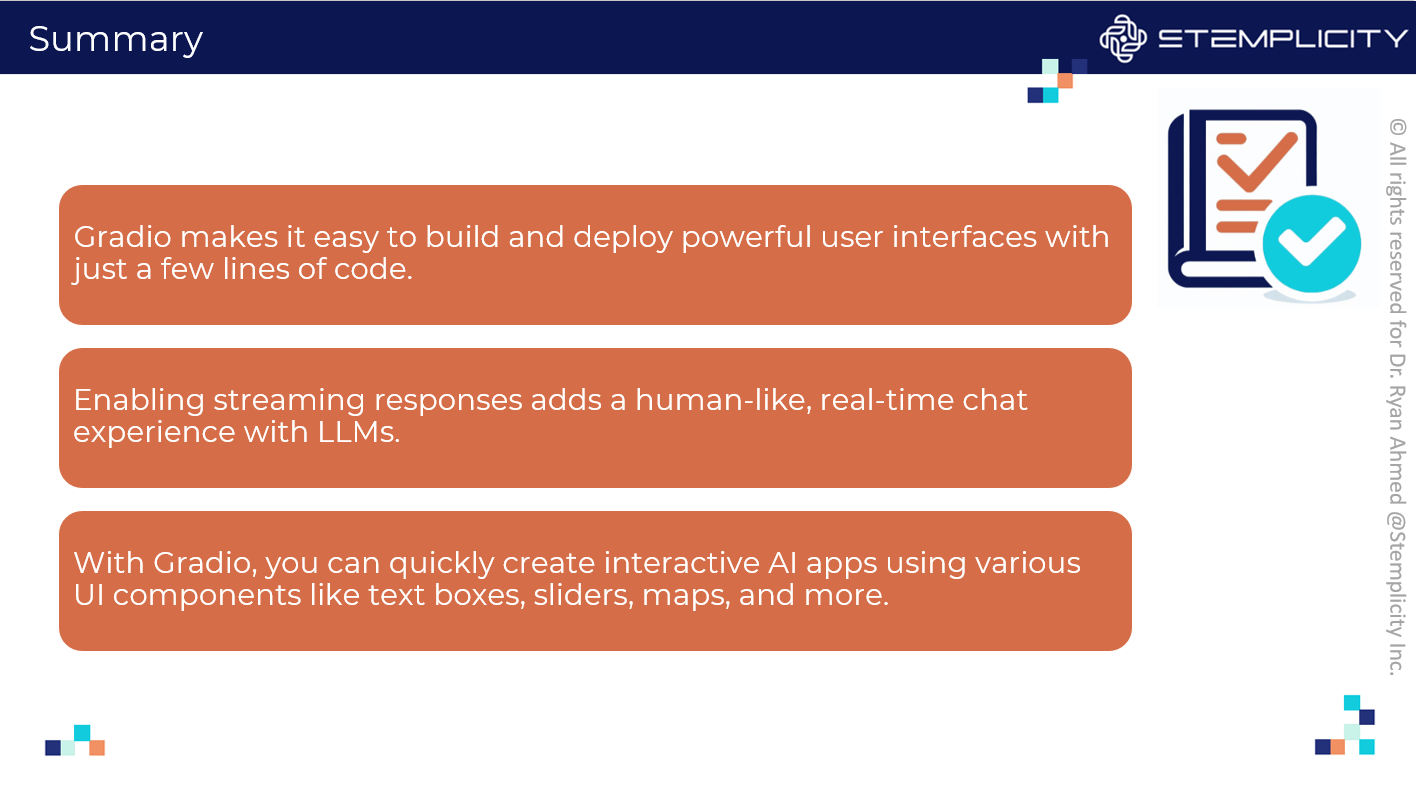

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

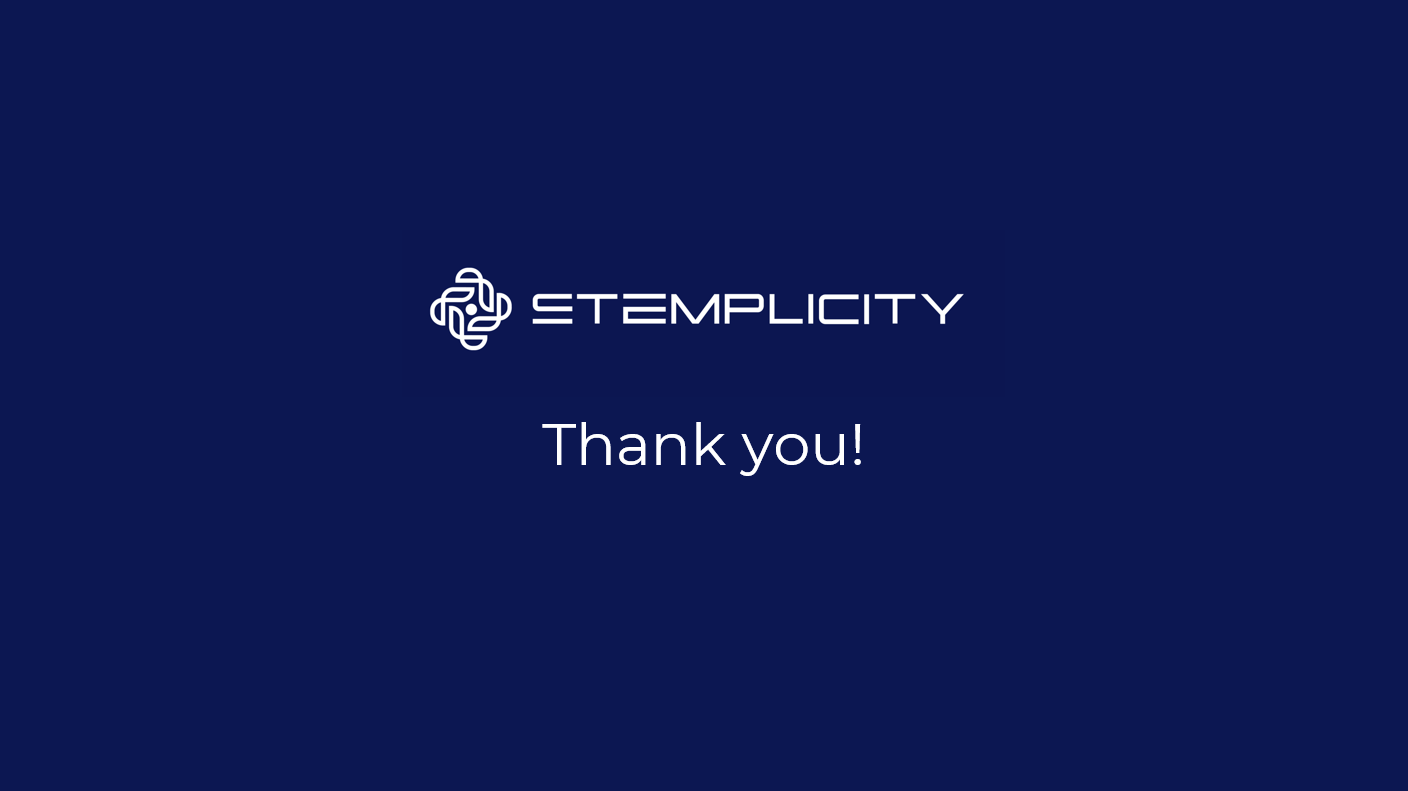